This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999.

Data are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics. Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population. Populations used for computing death rates after 2010 are postcensal estimates based on the 2010 census, estimated as of July 1, 2010. Rates for census years are based on populations enumerated in the corresponding censuses. Rates for non-census years before 2010 are revised using updated intercensal population estimates and may differ from rates previously published.

Causes of death classified by the International Classification of Diseases, Tenth Revision (ICD–10) are ranked according to the number of deaths assigned to rankable causes. Cause of death statistics are based on the underlying cause of death.

Q: How many people die of a certain disease for the year 1999-2016?
Q: What will be the total deaths because of a particular disease in all the states for the year 2016?
Q: What will be the age-adjusted death rates for every state?
Q: How many total people will die in the year 2017 because of these diseases using the trends of the previous years data?

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.stats as stats
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, output_file, show
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import time

In [190]:
#Reading data using URl

df = pd.read_csv('https://data.cdc.gov/api/views/bi63-dtpu/rows.csv')
df

# Printing Shape and Column names of the dataset
print (df.columns)
print (df.shape)

#Renaming the column name 113 cause name to Cause Name and Cause Name to Cause Type
df.rename(columns={'113 Cause Name': 'CauseName'}, inplace=True)
df.rename(columns={'Cause Name': 'CauseType'}, inplace=True)

#Printing first few rows of dataset
print (df.head())

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')
(10296, 6)
   Year                                          CauseName  \
0  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
1  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
2  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
3  2016  Accidents (unintentional injuries) (V01-X59,Y8...   
4  2016  Accidents (unintentional injuries) (V01-X59,Y8...   

                CauseType       State  Deaths  Age-adjusted Death Rate  
0  Unintentional injuries     Alabama    2755                     55.5  
1  Unintentional injuries      Alaska     439                     63.1  
2  Unintentional injuries     Arizona    4010                     54.2  
3  Unintentional injuries    Arkansas    1604                     51.8  
4  Unintentional injuries  California   13213                     32.0  


In [191]:
#Sorting the data in terms of states arranged alphabetically and year sorted in descending order
Arranging = df.sort_values(by=['Year', 'State'], ascending=[False, True])
#print (Arranging)

#Checking if there is any null value in the data as a part of cleaning the data
df.isnull().sum()

Year                       0
CauseName                  0
CauseType                  0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [192]:
#Dropping all the rows with ALL Causes in the CauseType(rename of Cause Name)

df.dropna(how = 'any').shape
df[df['CauseType'] != 'All causes']

,Year,CauseName,CauseType,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0
5,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Colorado,2880,51.2
6,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Connecticut,1978,50.3
7,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Delaware,516,52.4
8,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,District of Columbia,401,58.3
9,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Florida,12561,54.9


In [193]:
#Check the datatypes of the columns 
df.dtypes

Year                         int64
CauseName                   object
CauseType                   object
State                       object
Deaths                       int64
Age-adjusted Death Rate    float64
dtype: object

Q: How many people die of a certain disease for the year 1999-2016?

In this graph, we will carry out a histogram in order to solve know the number of deaths for a disease in the years 1999-2016. Here, I have assigned different colours for the disease and tthe X-axis represents the year and Y-axis represents the deaths. This makes the visulisation easy to understand.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1152x720 with 0 Axes>

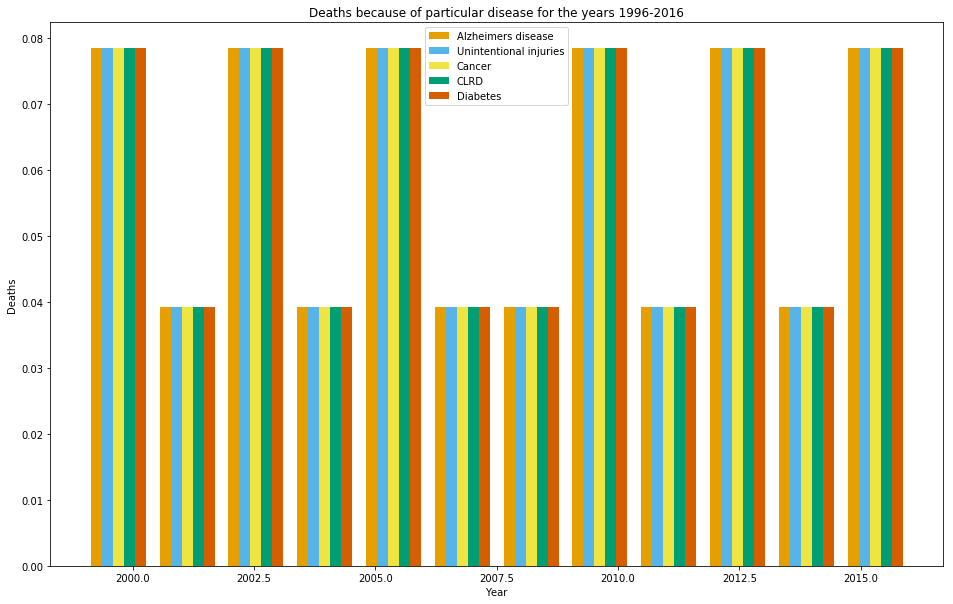

<Figure size 1152x720 with 0 Axes>

In [194]:
#plotting graph

x1 = list(df[df['CauseType'] == 'Alzheimer\'s disease']['Year'])
x2 = list(df[df['CauseType'] == 'Unintentional injuries']['Year'])
x3 = list(df[df['CauseType'] == 'Cancer']['Year'])
x4 = list(df[df['CauseType'] == 'CLRD']['Year'])
x5 = list(df[df['CauseType'] == 'Diabetes']['Year'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['Alzheimers disease', 'Unintentional injuries', 'Cancer',
         'CLRD', 'Diabetes']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.figure(figsize=(16,10))
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         color = colors, label = names)

# Plot formatting
plt.legend()
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Deaths because of particular disease for the years 1996-2016')

plt.figure(figsize=(16,10))

Q: What will be the total deaths because of a particular disease in all the states for the year 2016?

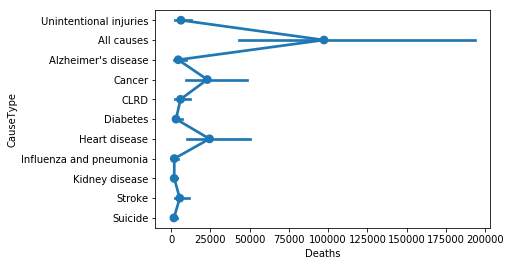

In [195]:
#creating pointplot 
ax = sns.pointplot(x='Deaths', y = 'CauseType',data = df.loc[df['Year'] == 2016])

Q: WHat will be the age-adjusted death rates for every state?

In [211]:
#creating a boxplot
plt.figure(figsize=(15,8))
bx = sns.scatterplot(x="State", y="Age-adjusted Death Rate", data=df[:10])


AttributeError: module 'seaborn' has no attribute 'scatterplot'

<Figure size 1080x576 with 0 Axes>

Time Series Analysis in order to predict the deaths for the year 2017 by using, training and testing certain models.

In [197]:
def plot_series(series_list, label_list=None):
    
    if(len(series_list)==1):
        plt.plot(series_list[0])
        
    else:
        markers = ['-*', '-+', '-o', '-s', '-^', '-v', '-d', '-x']
        if(label_list is None):
            for i in range(len(series_list)):
                plt.plot(series_list[i])
        
        else:
            for i in range(len(series_list)):
                plt.plot(range(series_list[0].size), series_list[i], markers[i], label=label_list[i])
        
        plt.legend(loc='upper right', prop={'size': 14})
        
    plt.xlabel('Year')
    plt.ylabel('Deaths')
    plt.gcf().set_size_inches(16, 5)
    plt.show()

In [198]:
df.columns

Index(['Year', 'CauseName', 'CauseType', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


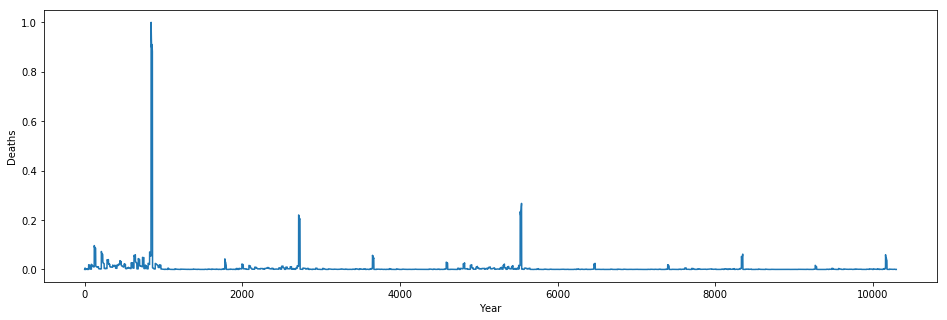

In [199]:
#data = pd.read_csv('https://data.cdc.gov/api/views/bi63-dtpu/rows.csv', header=None)
df = df.loc[1:]
df.columns = ['Year','CauseName','CauseType','State','Deaths','Age-adjusted Death Rate']

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

df['SCALED'] = scaler.fit_transform(df['Deaths'].values.reshape(df.shape[0], 1))
plot_series([df['SCALED']])

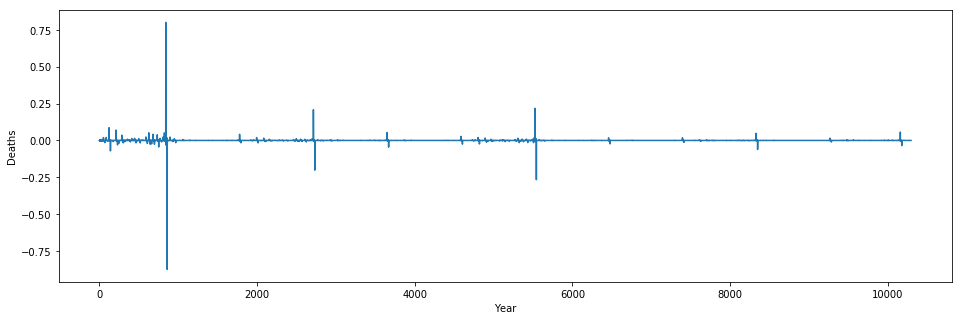

,Year,CauseName,CauseType,State,Deaths,Age-adjusted Death Rate,SCALED,DIFF
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1,0.000154,0.000000
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2,0.001471,0.001316
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8,0.000584,-0.000887
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0,0.004863,0.004280
5,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Colorado,2880,51.2,0.001054,-0.003809
6,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Connecticut,1978,50.3,0.000721,-0.000333
7,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Delaware,516,52.4,0.000182,-0.000539
8,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,District of Columbia,401,58.3,0.000140,-0.000042
9,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Florida,12561,54.9,0.004623,0.004483
10,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Georgia,4701,45.8,0.001725,-0.002898


In [200]:
df['DIFF'] = df['SCALED'].diff().fillna(0)
plot_series([df['DIFF']])
df

In [201]:
df.head()

,Year,CauseName,CauseType,State,Deaths,Age-adjusted Death Rate,SCALED,DIFF
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1,0.000154,0.000000
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2,0.001471,0.001316
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8,0.000584,-0.000887
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0,0.004863,0.004280
5,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Colorado,2880,51.2,0.001054,-0.003809


In [202]:
df['Deaths'] = df.Deaths.astype(int)
c = df.groupby('Year').Deaths.sum()
print (c)
b = c.to_frame()
print(b)

Year
1999    8594450
2000    8611090
2001    8631566
2002    8724520
2003    8720806
2004    8523496
2005    8675996
2006    8561880
2007    8540026
2008    8689930
2009    8551328
2010    8641568
2011    8769558
2012    8839734
2013    9014608
2014    9129652
2015    9451294
2016    9129206
Name: Deaths, dtype: int64
       Deaths
Year         
1999  8594450
2000  8611090
2001  8631566
2002  8724520
2003  8720806
2004  8523496
2005  8675996
2006  8561880
2007  8540026
2008  8689930
2009  8551328
2010  8641568
2011  8769558
2012  8839734
2013  9014608
2014  9129652
2015  9451294
2016  9129206


In [203]:
# Prepare the dataset - part 1
# select features and label values

b['SCALED_SHIFT'] = df['SCALED'].shift(1).fillna(0)


feature_dimension = 2
for i in range(1, feature_dimension+1):
    b['FEATURE_'+str(i)] = b['Deaths'].shift(i).fillna(0)

b['LABEL'] = b['Deaths']

# Prepare the dataset - part 2
# Create train and test dataset

split_index = 9
train_num = 13
test_num = 5

features = ['FEATURE_'+str(i) for i in range(1, feature_dimension+1)]
label = 'LABEL'

train_x = b[features].iloc[split_index-train_num:split_index]
train_y = b[label].iloc[split_index-train_num:split_index]

test_x = b[features].iloc[split_index:split_index+test_num]
test_y = b[label].iloc[split_index:split_index+test_num]
test_pre = b['SCALED_SHIFT'].iloc[split_index:split_index+test_num]
test_orig = b['data'].iloc[split_index:split_index+test_num]

print('Dataset created. Number of training samples: ' + str(train_num) + '. Number of test samples: ' + str(test_num))



KeyError: 'data'

In [ ]:
# The first model: Multi-Layer Perceptron (MLP)
# Modeling and Prediction using MLP

# Train the model
t1 = time.time()

reg = MLPRegressor(hidden_layer_sizes=(18, 12, 5), solver='sgd')
reg.fit(train_x, train_y)

t2 = time.time()
t = (t2-t1)/1000
print('{0:0.4f}'.format(t) + ' seconds for training MLP')

# Predict test samples
prd_mlp = reg.predict(test_x)

# Reconstruct the time-series from residuals
rec_mlp = reconstruct(scaler, test_pre, prd_mlp)

# Evaluate the model (calculate the test error MSE)
mse_dif_mlp = mean_squared_error(test_y, prd_mlp)
mse_orig_mlp = mean_squared_error(test_orig, rec_mlp)
print('MSE (differnce): ' + str(mse_dif_mlp))
print('MSE (original): ' + str(mse_orig_mlp))

# Evaluate the model (calculate the test error NMSE)
nmse_dif_mlp = mse_dif_mlp/np.var(test_y)
nmse_orig_mlp = mse_orig_mlp/np.var(test_orig)
print('NMSE (differnce): ' + str(nmse_dif_mlp))
print('NMSE (original): ' + str(nmse_orig_mlp))

# Plot the results
plot_series([test_y, prd_mlp], ['actual (dif)', 'predicted (dif)'])
plot_series([test_orig, rec_mlp], ['actual (original)', 'predicted (original)'])

In [ ]:
# The second model: Support Vector Regressor (SVR)
# Modeling and Prediction using SVR

# Train the model
t1 = time.time()

reg = SVR(kernel='poly', epsilon=0.05)
reg.fit(train_x, train_y)

t2 = time.time()
t = (t2-t1)/1000
print('{0:0.4f}'.format(t) + ' seconds for training SVR')

# Predict test samples
prd_svr = reg.predict(test_x)

# Reconstruct the time-series from residuals
rec_svr = reconstruct(scaler, test_pre, prd_svr)

# Evaluate the model (calculate the test error MSE)
mse_dif_svr = mean_squared_error(test_y, prd_svr)
mse_orig_svr = mean_squared_error(test_orig, rec_svr)
print('MSE (differnce): ' + str(mse_dif_svr))
print('MSE (original): ' + str(mse_orig_svr))

# Evaluate the model (calculate the test error NMSE)
nmse_dif_svr = mse_dif_svr/np.var(test_y)
nmse_orig_svr = mse_orig_svr/np.var(test_orig)
print('NMSE (differnce): ' + str(nmse_dif_svr))
print('NMSE (original): ' + str(nmse_orig_svr))

# Plot the results
plot_series([test_y, prd_svr], ['actual (dif)', 'predicted (dif)'])
plot_series([test_orig, rec_svr], ['actual (original)', 'predicted (original)'])